## Manual Linear Regression

In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [3]:
def forward(x):
    y = w*x + b
    return y

In [5]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

## Linear Regression

In [6]:
from torch.nn import Linear

In [9]:
torch.manual_seed(1)
model = Linear(in_features = 1, out_features = 1)

In [10]:
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [12]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


## Object Oriented Linear Regression

In [13]:
import torch.nn as nn

In [21]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [22]:
torch.manual_seed(1)
model = LR(1, 1)

In [24]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [125]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Text(0.5, 0, 'x')

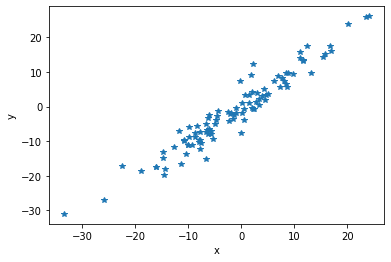

In [126]:
X = torch.randn(100, 1) * 10
y = X + torch.randn(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), '*')
plt.ylabel('y')
plt.xlabel('x')

In [127]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [128]:
torch.manual_seed(1)
model = LR(1, 1)

In [129]:
[w, b] = model.parameters()

def get_params():
    return (w[0][0].item(), b[0].item())

In [130]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

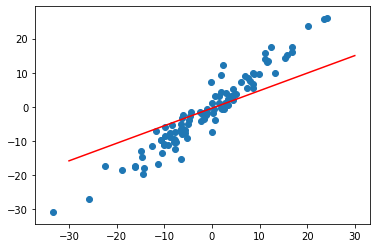

In [131]:
plot_fit('Initial Model')

In [132]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [133]:
epochs = 87
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 36.448333740234375
epoch: 1 loss: 25.847068786621094
epoch: 2 loss: 19.274919509887695
epoch: 3 loss: 15.200483322143555
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.108229637145996
epoch: 6 loss: 10.137073516845703
epoch: 7 loss: 9.53479290008545
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.695876121520996
epoch: 12 loss: 8.640158653259277
epoch: 13 loss: 8.605379104614258
epoch: 14 loss: 8.583581924438477
epoch: 15 loss: 8.569830894470215
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551655769348145
epoch: 19 loss: 8.549100875854492
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545923233032227
epoch: 22 loss: 8.54485034942627
epoch: 23 loss: 8.54395580291748
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.542455673217773
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.5399

Text(0.5, 0, 'Epoch')

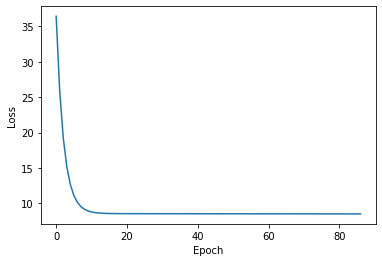

In [134]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

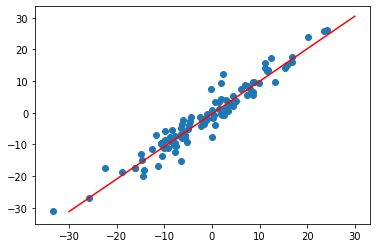

In [135]:
plot_fit("Trained Model")